## boiler plate

In [20]:
import os
import warnings
import pandas as pd
import tensorflow as tf
import numpy as np
import random
import torch
import random as rn
from keras import backend as K
from util.som import Som
from pylab import plot, axis, show, pcolor, colorbar, bone

def set_seed_():

    seed_num = 42
    np.random.seed(seed_num)
    rn.seed(seed_num)
    tf.random.set_seed(seed_num)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                                            inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    K.set_session(sess)


class config:
    seed = 42
    device = "cuda:0"

    lr = 1e-3
    epochs = 25
    batch_size = 32
    num_workers = 4
    train_5_folds = True


def seed_everything_tc(seed: int = 42):  # torch
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # type: ignore
    torch.backends.cudnn.deterministic = True  # type: ignore
    torch.backends.cudnn.benchmark = True  # type: ignore


def seed_everything_ts(seed: int = 42):  # tensorflow
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)

# boiler plate
warnings.filterwarnings(action = 'ignore')
seed_everything_ts(config.seed)
root_path = '/Users/hansolhong/PycharmProjects/data'
input_path = 'detect_pilot/input'
output_path = 'detect_pilot/output'

tr_df = pd.read_csv(os.path.join(root_path, input_path, 'train.csv'))
te_df = pd.read_csv(os.path.join(root_path, input_path, 'test.csv'))
va_df = pd.read_csv(os.path.join(root_path, input_path, 'val.csv'))
sa_df = pd.read_csv(os.path.join(root_path, input_path, 'sample_submission.csv'))

In [21]:
print(tr_df)  # 113842 31
print(te_df)  # 142503 31
print(va_df)  # 28462 32
print(sa_df)  # 142503 2

            ID         V1         V2        V3        V4        V5        V6  \
0            3  -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
1            4  -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
2            6  -0.425966   0.960523  1.141109 -0.168252  0.420987 -0.029728   
3            8  -0.644269   1.417964  1.074380 -0.492199  0.948934  0.428118   
4            9  -0.894286   0.286157 -0.113192 -0.271526  2.669599  3.721818   
...        ...        ...        ...       ...       ...       ...       ...   
113837  284796 -12.516732  10.187818 -8.476671 -2.510473 -4.586669 -1.394465   
113838  284797   1.884849  -0.143540 -0.999943  1.506772 -0.035300 -0.613638   
113839  284798  -0.241923   0.712247  0.399806 -0.463406  0.244531 -1.343668   
113840  284802   0.120316   0.931005 -0.546012 -0.745097  1.130314 -0.235973   
113841  284803 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   

              V7        V8        V9  .

## som

In [38]:
va_df_ = va_df.drop(['ID','Class'], axis = 1)
va_df_arr = np.array(va_df_)
labels = va_df[['Class']]

In [33]:
som = Som(30, 30, 30, sigma = 1.0, learning_rate = .5, random_seed = 3)
som.random_weights_init(va_df_arr)
som.train_random(va_df_arr, 10000)

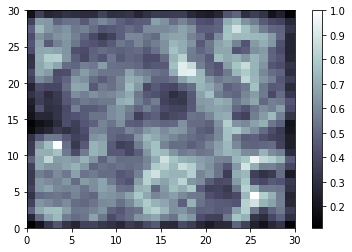

In [34]:
bone()
pcolor(som.distance_map().T)
colorbar()

In [ ]:
# indexing
labels[labels.Class == 0] = 0
labels[labels.Class == 1] = 1

marker = ['o', '.']
colors = ['lightgreen', 'red']

for cnt, xx in enumerate(va_df_arr):

    try:
        w = som.winner(xx)
        plot(w[0] + .5, w[1] + .5, marker[labels[cnt]],
             markerfacecolor='None',
             markeredgecolor=colors[labels[cnt]],
             markersize=12,
             markeredgewidth=2)
        axis([0, som.weights.shape[0], 0, som.weights.shape[1]])
    except:
        pass

show()